<a href="https://colab.research.google.com/github/nrjcs/foundation_aiml/blob/master/visualisation/f_mnist_vis_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisation of CNN
## A pretrained model trained on Fashion_mnist dataset is used which also provided in the repository

In [0]:
from __future__ import print_function

import datetime
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt


### Mount  google drive

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Load Pretrained model

In [13]:
model = load_model("fashion_mnist.h5")

W0702 17:01:31.420526 139887957669760 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 17:01:31.466660 139887957669760 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 17:01:31.533433 139887957669760 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0702 17:01:31.540349 139887957669760 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 17:01:31.542073 139887957669760 deprecation_wrap

### Print the model summary

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### Get the names of model layers in the dictionary

In [31]:
# get the symbolic outputs of each "key" layer 
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{u'dense_2': <keras.layers.core.Dense object at 0x7f39fd52d890>, u'dense_1': <keras.layers.core.Dense object at 0x7f39fd4bf310>, u'flatten_1': <keras.layers.core.Flatten object at 0x7f39fd4bfa10>, u'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7f39fd506e90>, u'dropout_1': <keras.layers.core.Dropout object at 0x7f39fd506d50>, u'dropout_2': <keras.layers.core.Dropout object at 0x7f39fd506110>, u'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7f39fd5badd0>, u'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7f39fd506090>}


### Visualise the filters (not the feature maps)

(3, 3, 32, 64)
(64, 32, 3, 3)


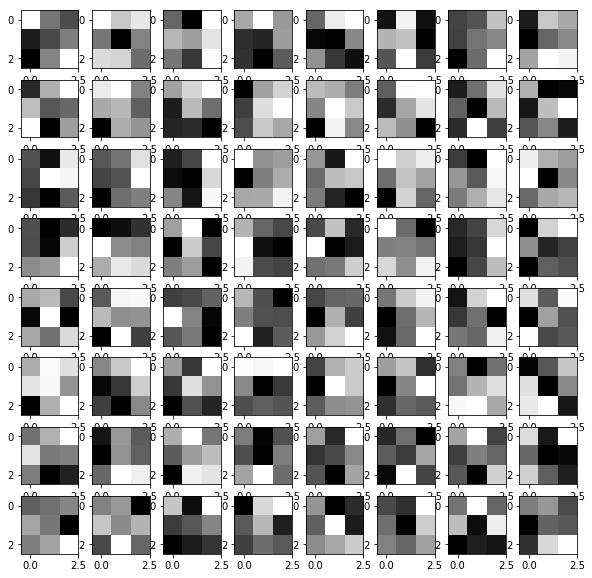

In [33]:

layer_variables = model.get_layer('conv2d_2').get_weights() # get the layer variables from the model

weights = layer_variables[0]  # weights are the actual filter values 
biases = layer_variables[1]   # biases of the layer

w = np.array(weights)
print(w.shape)

# Now to visualize each of the filters we need to shift the axis

w = np.moveaxis(w, 2, 0) # move axis 2 to 0
w = np.moveaxis(w, 3, 0) # move axis 3 to 0
print(w.shape)

# the total filter in previous layers will be obtained from w.shape[1]
total_filters_in_prev_layers = 64

cols = 8
rows = 8
# rows * cols > total_filters

# current_filter = which filter's weights we want to see
current_filter = 1 # change this to see other filters as you wish

fig = plt.figure(figsize=(10, 10))

for i in range(w.shape[0]):
    current_filter = i        
    for each_depth in range(w.shape[1]):
        fig.add_subplot(rows, cols, current_filter+1)
        plt.imshow(w[current_filter][each_depth], cmap='gray')

(28, 28)
(1, 28, 28, 1)


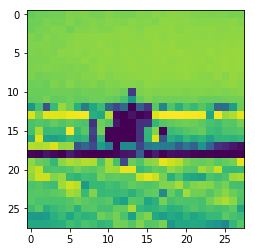

In [19]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('new1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img,(28, 28))
print(img2.shape)
plt.imshow(img2)
img2 = np.array(img2)
img2 = np.reshape(img2, (1, img2.shape[0], img2.shape[1], 1))
print(img2.shape)

# We need to feed an image having 1, 224, 224, 3 dimension

### Obtain the intermediate layers for visualisation

In [36]:
from keras.models import Model

layer_name = 'conv2d_2'

intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

intermediate_output = intermediate_layer_model.predict(img2)
# print(intermediate_output)
print(intermediate_output.shape)

output = np.squeeze(intermediate_output)
output = np.moveaxis(output, 2, 0)

print(output.shape)

(1, 24, 24, 64)
(64, 24, 24)


(1, 24, 24, 64)
(64, 24, 24)


### Visualise the outputs of the intermediate layers
### These are the actual activations of obtained that is, feature maps

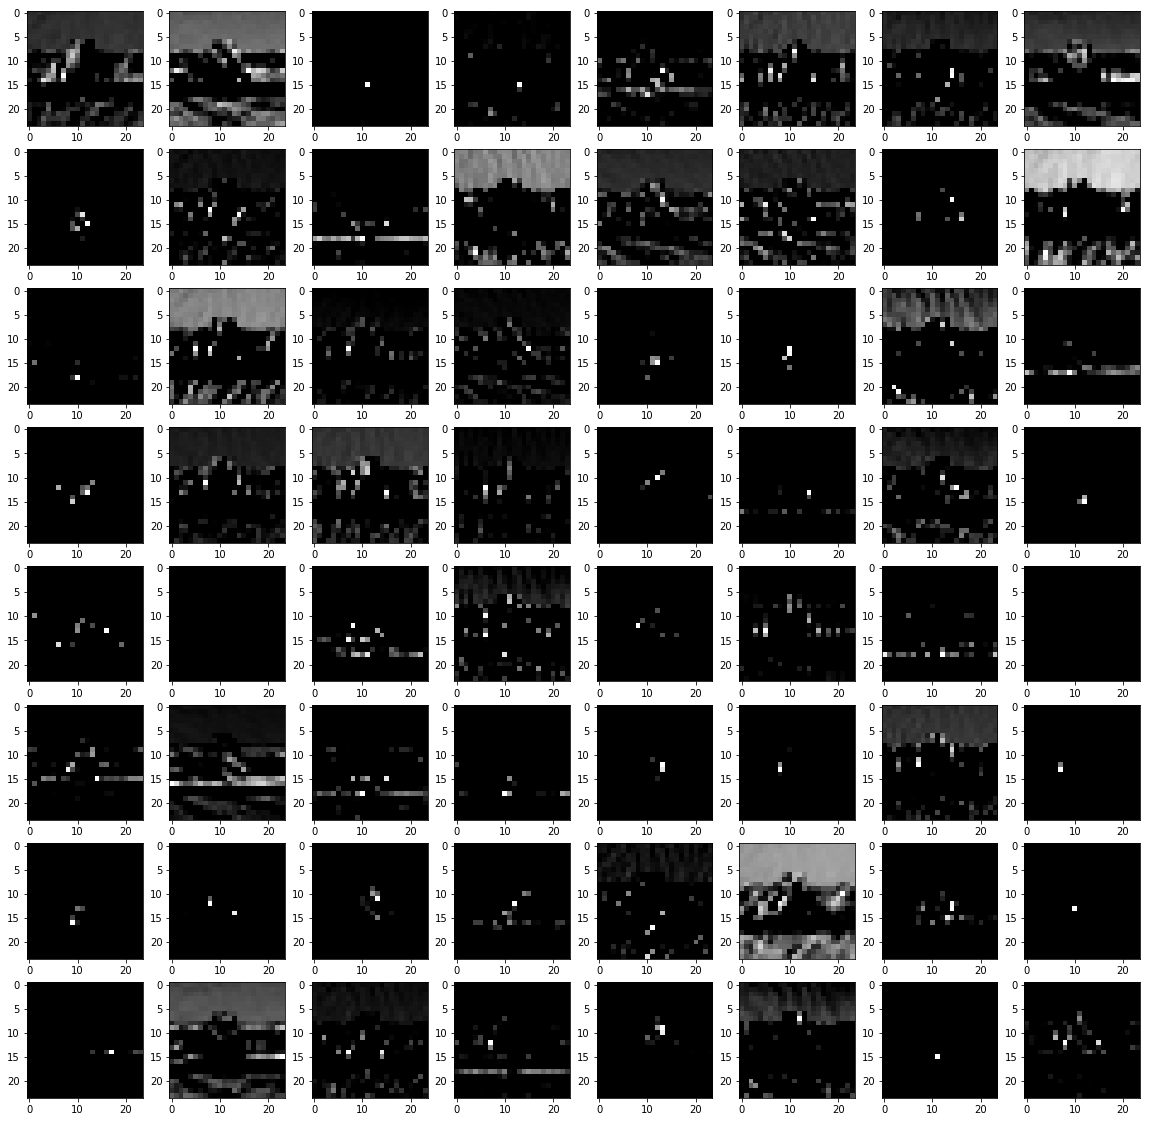

In [23]:
fig = plt.figure(figsize=(20, 20))

no_filters = 256

cols = 8
rows = 8

for i in range(output.shape[0]):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(output[i], cmap='gray')

## Maximise the layers activation 
### Here we need to remove the top layers and add calculate the loss funtion at the convolution layers and try to maximize the the response by reducing the loss 

In [0]:
input_img = model.input

layer_name = 'conv2d_2'
filter_index = 10          # consider 10th filter in layer 'conv2d_2' out of 64 total filters

layer_output = layer_dict[layer_name].output

# Loss function will be the mean of all the values in the output layer filter.
# e.g. the after convolution assume that the shape of output is 96x96 then we'll average out all the values to have a single value
loss_fxn = K.mean(layer_output[:, :, :, filter_index])

# Find gradient of loss_fxn w.r.t. the input_img
# it will be 256x256 matrix and each value represent the gradient of loss_fxn w.r.t. that particular pixel
gradient = K.gradients(loss_fxn, input_img)[0]

# Normalize the gradient
# Here we also didnt subtracted the mean value from the gradient to keep it positive
gradient = gradient / (K.sqrt(K.mean(K.square(gradient))) + 1e-05)

iterate = K.function([input_img], [loss_fxn, gradient])

In [37]:
w = 28
h = 28

input_img_data = np.random.random((1, w, h, 1))*20 + 128
# random noisy image of dims 1, 3 (channels to visualize RGB), width, heights

step_size = 1
# step size for gradient to pass to input image. It is like a learning rate, how much we want to learn from gradient.

steps = 10
for i in range(steps):
    loss, grads = iterate([input_img_data])
    # Here loss will continuously increase as we are adding gradient and we want to move in the direction of gradient
    input_img_data = input_img_data + grads*step_size
    # with each iteration input image will get updated and the new gradient will be calculated based on new image
    # Here, we add the gradient in the image which means we are going in the direction of the gradient
    # So, we want to see for a given filter which input image (noise) provides higher value of loss function which is
    # the activation for that filter. So at the end of the iterations we will have an image which will maximize the activation
    # of a given filter. 
    # So at the end we'll get most favorable input images that when feeded to the model it creates maximum activation for that particular filter.
    # That is why we can call this a gradient ASCENT METHOD.
    print("Step: {}/{}, Loss: {}".format(i+1, steps, loss))

Step: 1/10, Loss: 0.0305034257472
Step: 2/10, Loss: 0.191351354122
Step: 3/10, Loss: 0.417335867882
Step: 4/10, Loss: 0.654163658619
Step: 5/10, Loss: 0.902979552746
Step: 6/10, Loss: 1.16488111019
Step: 7/10, Loss: 1.44214081764
Step: 8/10, Loss: 1.72273361683
Step: 9/10, Loss: 1.99952912331
Step: 10/10, Loss: 2.27211213112


### Function to convert the tensor into a valid image

(28, 28, 3)


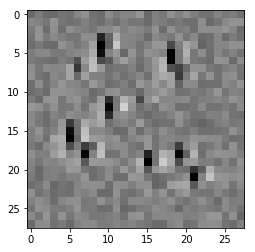

In [35]:
from scipy.misc import imsave

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data[0]
img = deprocess_image(img)
cv2.imwrite("noise.jpg",img)
img = cv2.imread('noise.jpg')
print(img.shape)
plt.imshow(img)
plt.show()

### Maximisation of ativation by modifying the input

In [0]:
from keras import backend as K
from scipy.misc import imsave
import numpy as np
import os
from skimage.io import imsave

def get_filter_visualizations(model, input_w, input_h, layer_name, no_steps, single_filter=False, single_filter_no=0):
    input_image = model.input
    
    my_layer_dict = dict([(layer.name, layer) for layer in model.layers])
    
    if single_filter == False:
        no_filters = np.array(my_layer_dict[layer_name].get_weights()[0]).shape[3]
        
        for i in range(no_filters):
            filter_index = i
            layer_o_p = my_layer_dict[layer_name].output
            loss_ = K.mean(layer_o_p[:, :, :, filter_index])
            grad = K.gradients(loss_, input_image)[0]
            grad = grad / (K.sqrt(K.mean(K.square(grad))) + 1e-05)
            iterate_model = K.function([input_image], [loss_, grad])

            input_noise = np.random.random((1, input_w, input_h, 1))*20 + 128  #changed from 3 to 1 channels
            step_size = 1

            for j in range(no_steps):
                L, G = iterate_model([input_noise])
                input_noise = input_noise + G*step_size 

            input_noise -= input_noise.mean()
            input_noise /= (input_noise.std() + 1e-5)
            input_noise *= 0.1

            input_noise += 0.5
            input_noise = np.clip(input_noise, 0, 1)

            input_noise *= 255
            input_noise = np.clip(input_noise, 0, 255).astype('uint8')

            input_noise = np.squeeze(input_noise)

            save_path = "visuals/" + layer_name
            file_name = layer_name + "_filter_" + str(filter_index) + ".png"

            if not os.path.exists(save_path):
                os.makedirs(save_path)
            imsave('%s/%s' % (save_path, file_name),input_noise)
    else:
        no_filters = 1
        
        for i in range(no_filters):
            filter_index = single_filter_no
            layer_o_p = my_layer_dict[layer_name].output
            loss_ = K.mean(layer_o_p[:, :, :, filter_index])
            grad = K.gradients(loss_, input_image)[0]
            grad = grad / (K.sqrt(K.mean(K.square(grad))) + 1e-05)
            iterate_model = K.function([input_image], [loss_, grad])

            input_noise = np.random.random((1, input_w, input_h, 3))*20 + 128
            step_size = 1

            for j in range(no_steps):
                L, G = iterate_model([input_noise])
                input_noise = input_noise + G*step_size 

            input_noise -= input_noise.mean()
            input_noise /= (input_noise.std() + 1e-5)
            input_noise *= 0.1

            input_noise += 0.5
            input_noise = np.clip(input_noise, 0, 1)

            input_noise *= 255
            input_noise = np.clip(input_noise, 0, 255).astype('uint8')

            input_noise = np.squeeze(input_noise)

            save_path = "visuals/" + "_" + str(filter_index)
            file_name = layer_name + "_filter_" + str(filter_index) + ".png"

            if not os.path.exists(save_path):
                os.makedirs(save_path)
            imsave('%s/%s' % (save_path, file_name),input_noise)

In [0]:
get_filter_visualizations(model, 28, 28, 'conv2d_1', 2)